In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
%matplotlib inline


float64


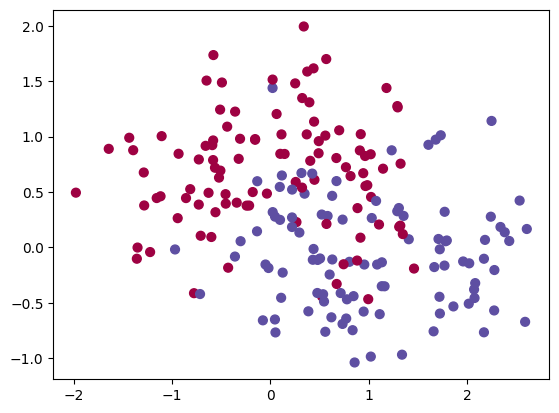

In [2]:
X, y = make_moons(n_samples=200, noise=0.4, random_state=42)
print(X.dtype)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

In [3]:
class Logistic(nn.Module):
  def __init__(self, in_feature, out_feature):
    super().__init__()
    self.linear1 = nn.Linear(in_feature, 10)
    self.linear2 = nn.Linear(10, 5)
    self.linear3 = nn.Linear(5, out_feature)

  def forward(self, X):
    X = F.tanh(self.linear1(X))
    X = F.tanh(self.linear2(X))
    X = F.sigmoid(self.linear3(X))
    return X

In [4]:
X_tensor = torch.from_numpy(X.astype(np.single))
y = y.reshape(-1, 1)
y_tensor = torch.from_numpy(y.astype(np.single))
torch.set_default_dtype(torch.float32)
model = Logistic(X.shape[1], y.shape[1])
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-5)


for i in range(10000):
  y_pred = model(X_tensor)
  loss = criterion(y_pred, y_tensor)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

  if i % 1000 == 0:
    print(f"Iter {i}: loss {loss.item():.5f}")

Iter 0: loss 0.72754
Iter 1000: loss 0.38969
Iter 2000: loss 0.36613
Iter 3000: loss 0.30956
Iter 4000: loss 0.29960
Iter 5000: loss 0.29417
Iter 6000: loss 0.28936
Iter 7000: loss 0.28625
Iter 8000: loss 0.28377
Iter 9000: loss 0.28138


In [5]:
model.eval()
with torch.no_grad():
  y_pred = model(X_tensor).data.numpy()
  pred = np.where(y_pred > 0.5, True, False)
  accuracy = np.sum(pred == y)/len(y) * 100
  print(accuracy)


86.0


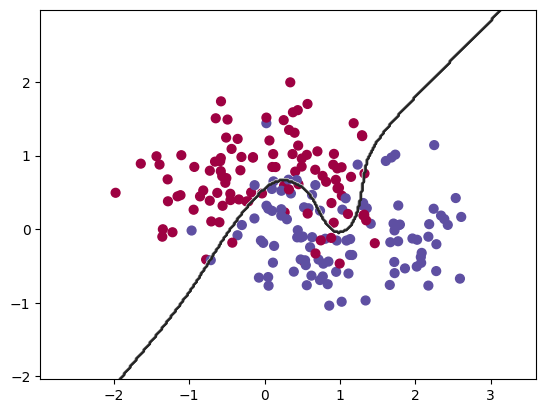

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
with torch.no_grad():
	Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()].astype(np.single)))
Z = np.array(list(map(round, Z.squeeze().detach().numpy()))).reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.binary)